In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import hdbscan
from sklearn.datasets import make_blobs
from deepART import dataset

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
x, y = make_blobs(n_samples=200, n_features=2, centers=np.array([[0.7, 0.55], [0.95,0.95]]), cluster_std=0.03, center_box=(0, 1), shuffle=True, random_state=100)
sample_data = dataset.Dataset(x)

<IPython.core.display.Javascript object>


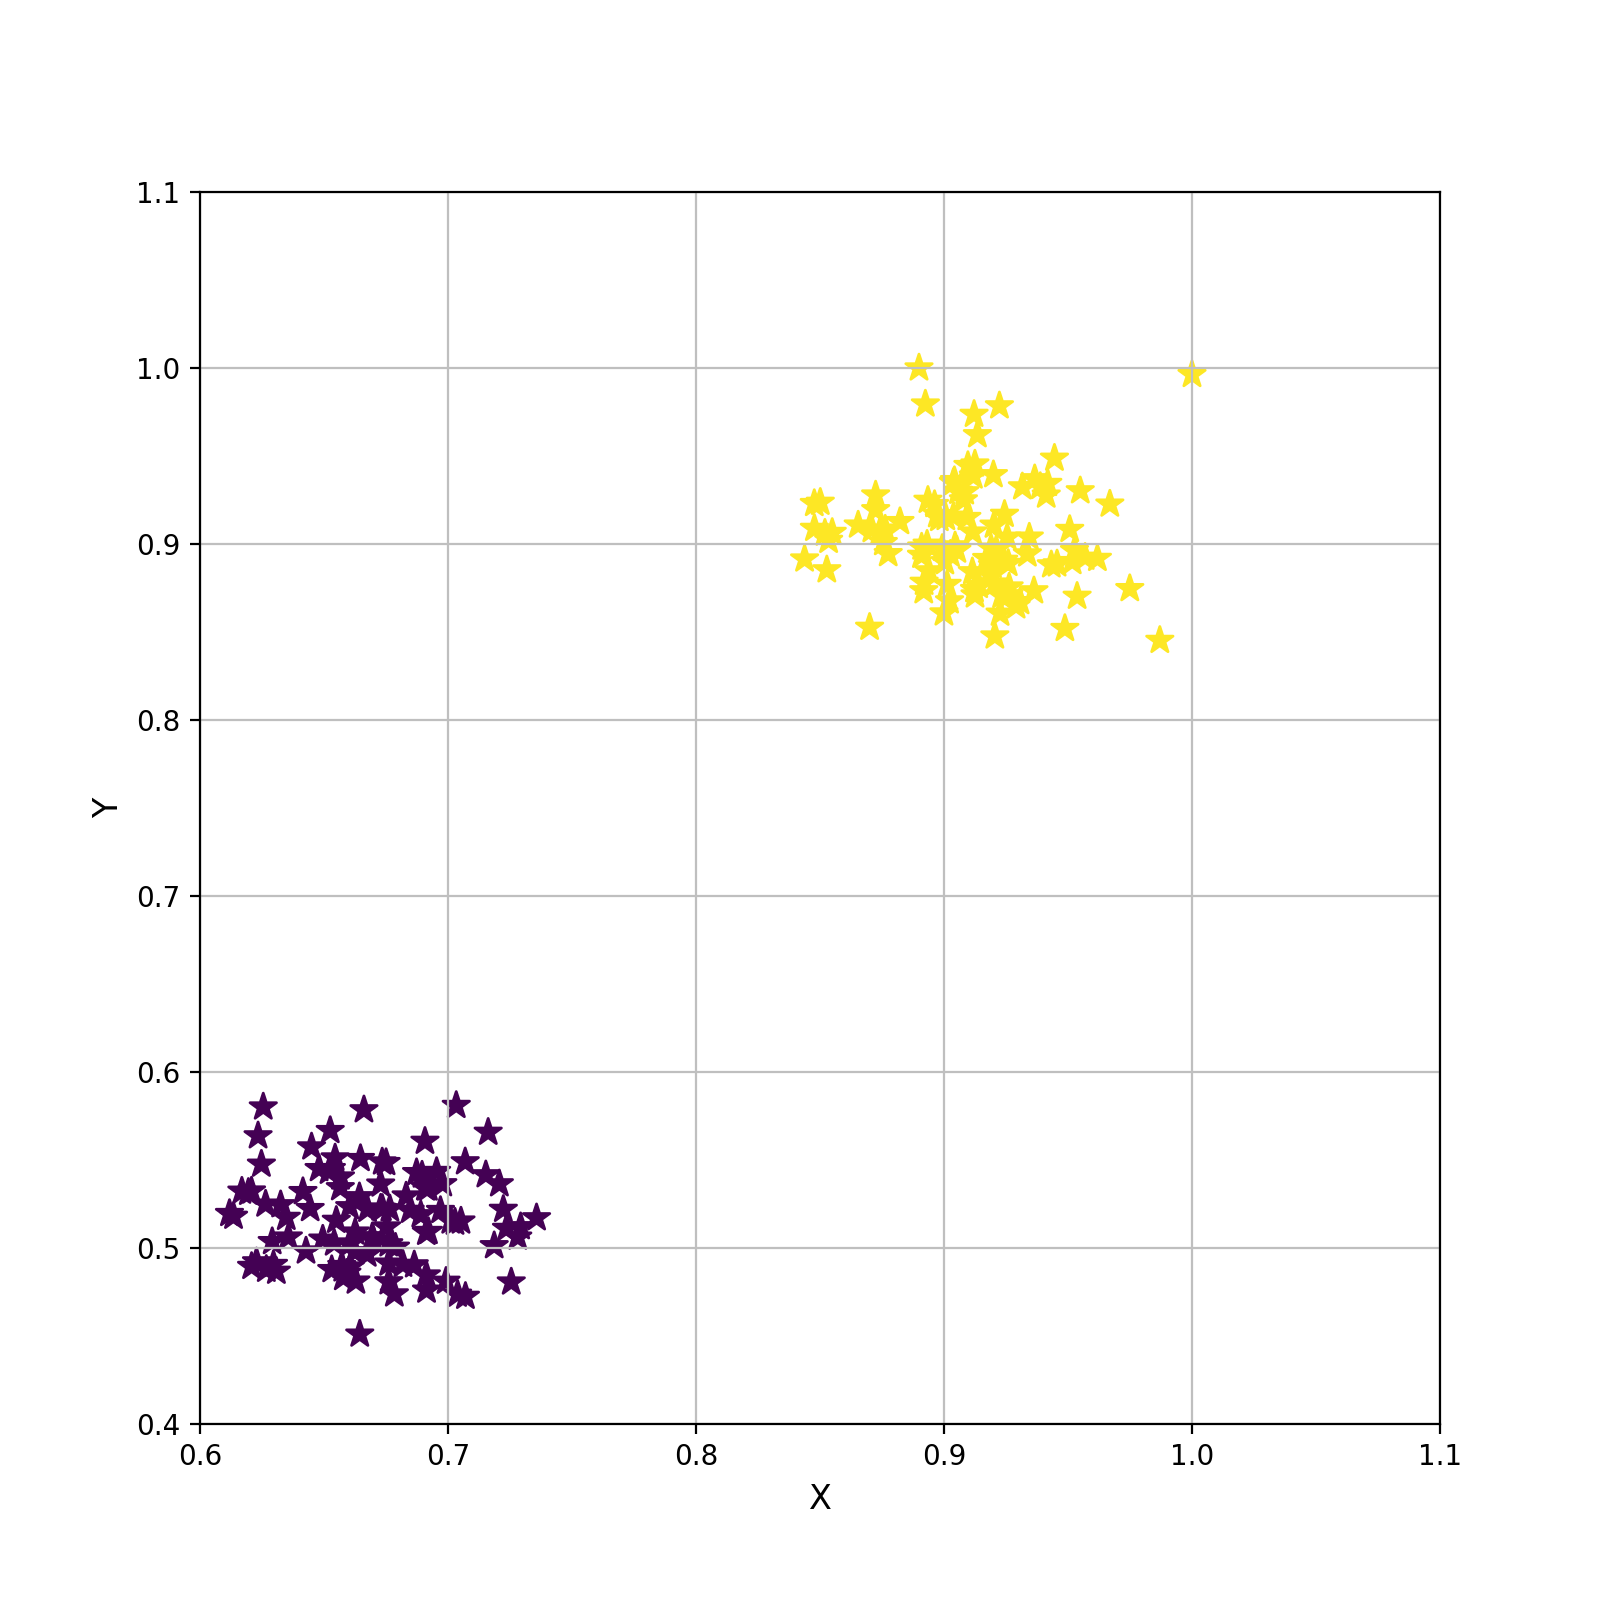

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=y,marker='*')
ax.axis((0, 1, 0, 1))
plt.ylim(0.4, 1.1)
plt.xlim(0.6, 1.1)
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(sample_data.data_normalized)

In [5]:
clusterer.probabilities_

array([0.54866863, 0.94819127, 0.62820612, 0.67920119, 0.85186188,
       0.70012235, 0.89723068, 0.77917024, 0.62557466, 0.6082706 ,
       0.9644352 , 0.83431333, 0.48121224, 0.43213971, 0.88533394,
       1.        , 0.28439623, 0.590855  , 0.52336506, 0.93406471,
       0.48283435, 0.54523706, 0.52965586, 0.71350772, 0.55130385,
       0.3576723 , 1.        , 1.        , 0.72462049, 1.        ,
       0.76493297, 0.74133457, 0.58801345, 0.49951018, 0.44627025,
       1.        , 1.        , 0.92039446, 0.95682065, 0.80181145,
       0.88738766, 0.61870828, 1.        , 1.        , 1.        ,
       0.72285773, 0.92130144, 0.96197268, 0.90385116, 0.14862908,
       0.55406341, 0.56847377, 0.68174053, 1.        , 0.93422926,
       1.        , 0.96390747, 0.88876882, 0.30718819, 0.73766052,
       0.66868546, 0.31575186, 0.82547834, 0.68198553, 0.75710868,
       0.61386538, 0.53603767, 0.89723068, 0.48656364, 0.95158695,
       0.8600885 , 0.55715228, 0.79062594, 0.70476305, 0.89723

In [6]:
def unpack_results(pred,target,target_scores):
    #unpack result tuples
    pred_k = []
    scores = []
    data_contour = np.empty((0,2),dtype=np.float32)
    for n, results in enumerate(pred):
        if results == target:
            data_contour = np.vstack((data_contour, sample_data.data_normalized[n]))
            scores.append(target_scores[n])
    return data_contour, scores

def plot_countour(fig,data_contour, scores, sub_index, nplots=(3,2)):
    ax = fig.add_subplot(nplots[0],nplots[1],sub_index)

    ax.set_title("Clustering Results ",fontsize=14)
    ax.set_xlabel("X",fontsize=12)
    ax.set_ylabel("Y",fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    # scatter with colormap mapping to predicted class
    ax.tricontour(data_contour[...,0], data_contour[...,1], scores, 14, linewidths=0, colors='k')
    cntr2 = ax.tricontourf(data_contour[...,0], data_contour[...,1], scores, 14, cmap="RdBu_r",)

    fig.colorbar(cntr2, ax=ax)
    ax.plot(data_contour[...,0], data_contour[...,1], 'ko', ms=0.5)
    ax.axis((0, 1, 0, 1))
    ax.set_title('Cluster {}'.format(int(sub_index-1)))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    #fig.savefig('data_clustered.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


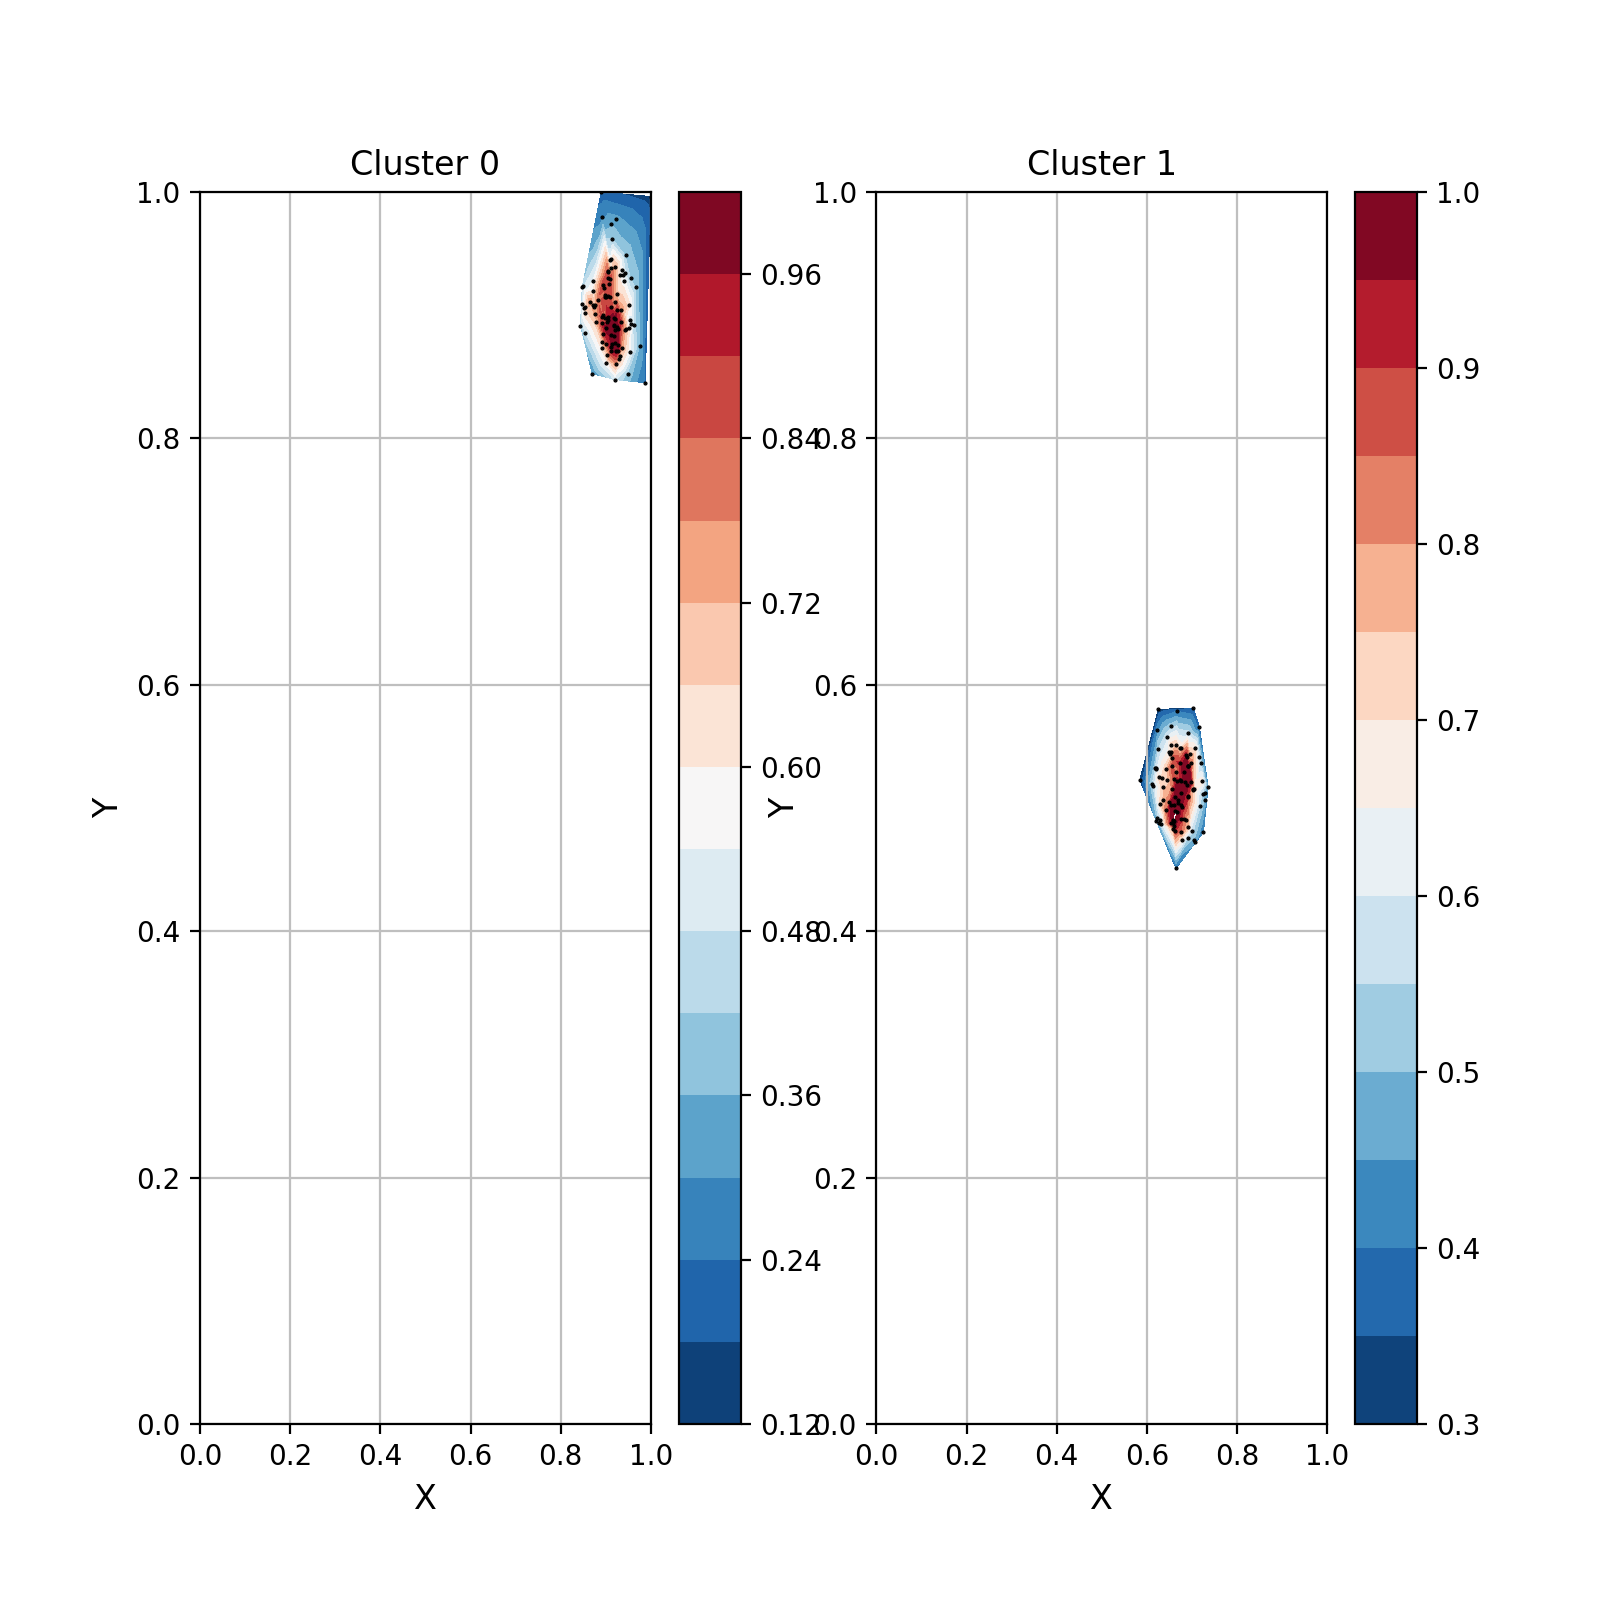

In [7]:
#plot out clusters memebership
fig = plt.figure(figsize=(8,8))
nplots = (int(np.ceil(2/2)), 2)
for i in range(2):
    data_contour, scores = unpack_results(clusterer.labels_,target=i, target_scores=clusterer.probabilities_)
    plot_countour(fig, data_contour,scores, sub_index=i+1,nplots=nplots)
# plt.savefig("hdbscan_contour_1.png")

<IPython.core.display.Javascript object>


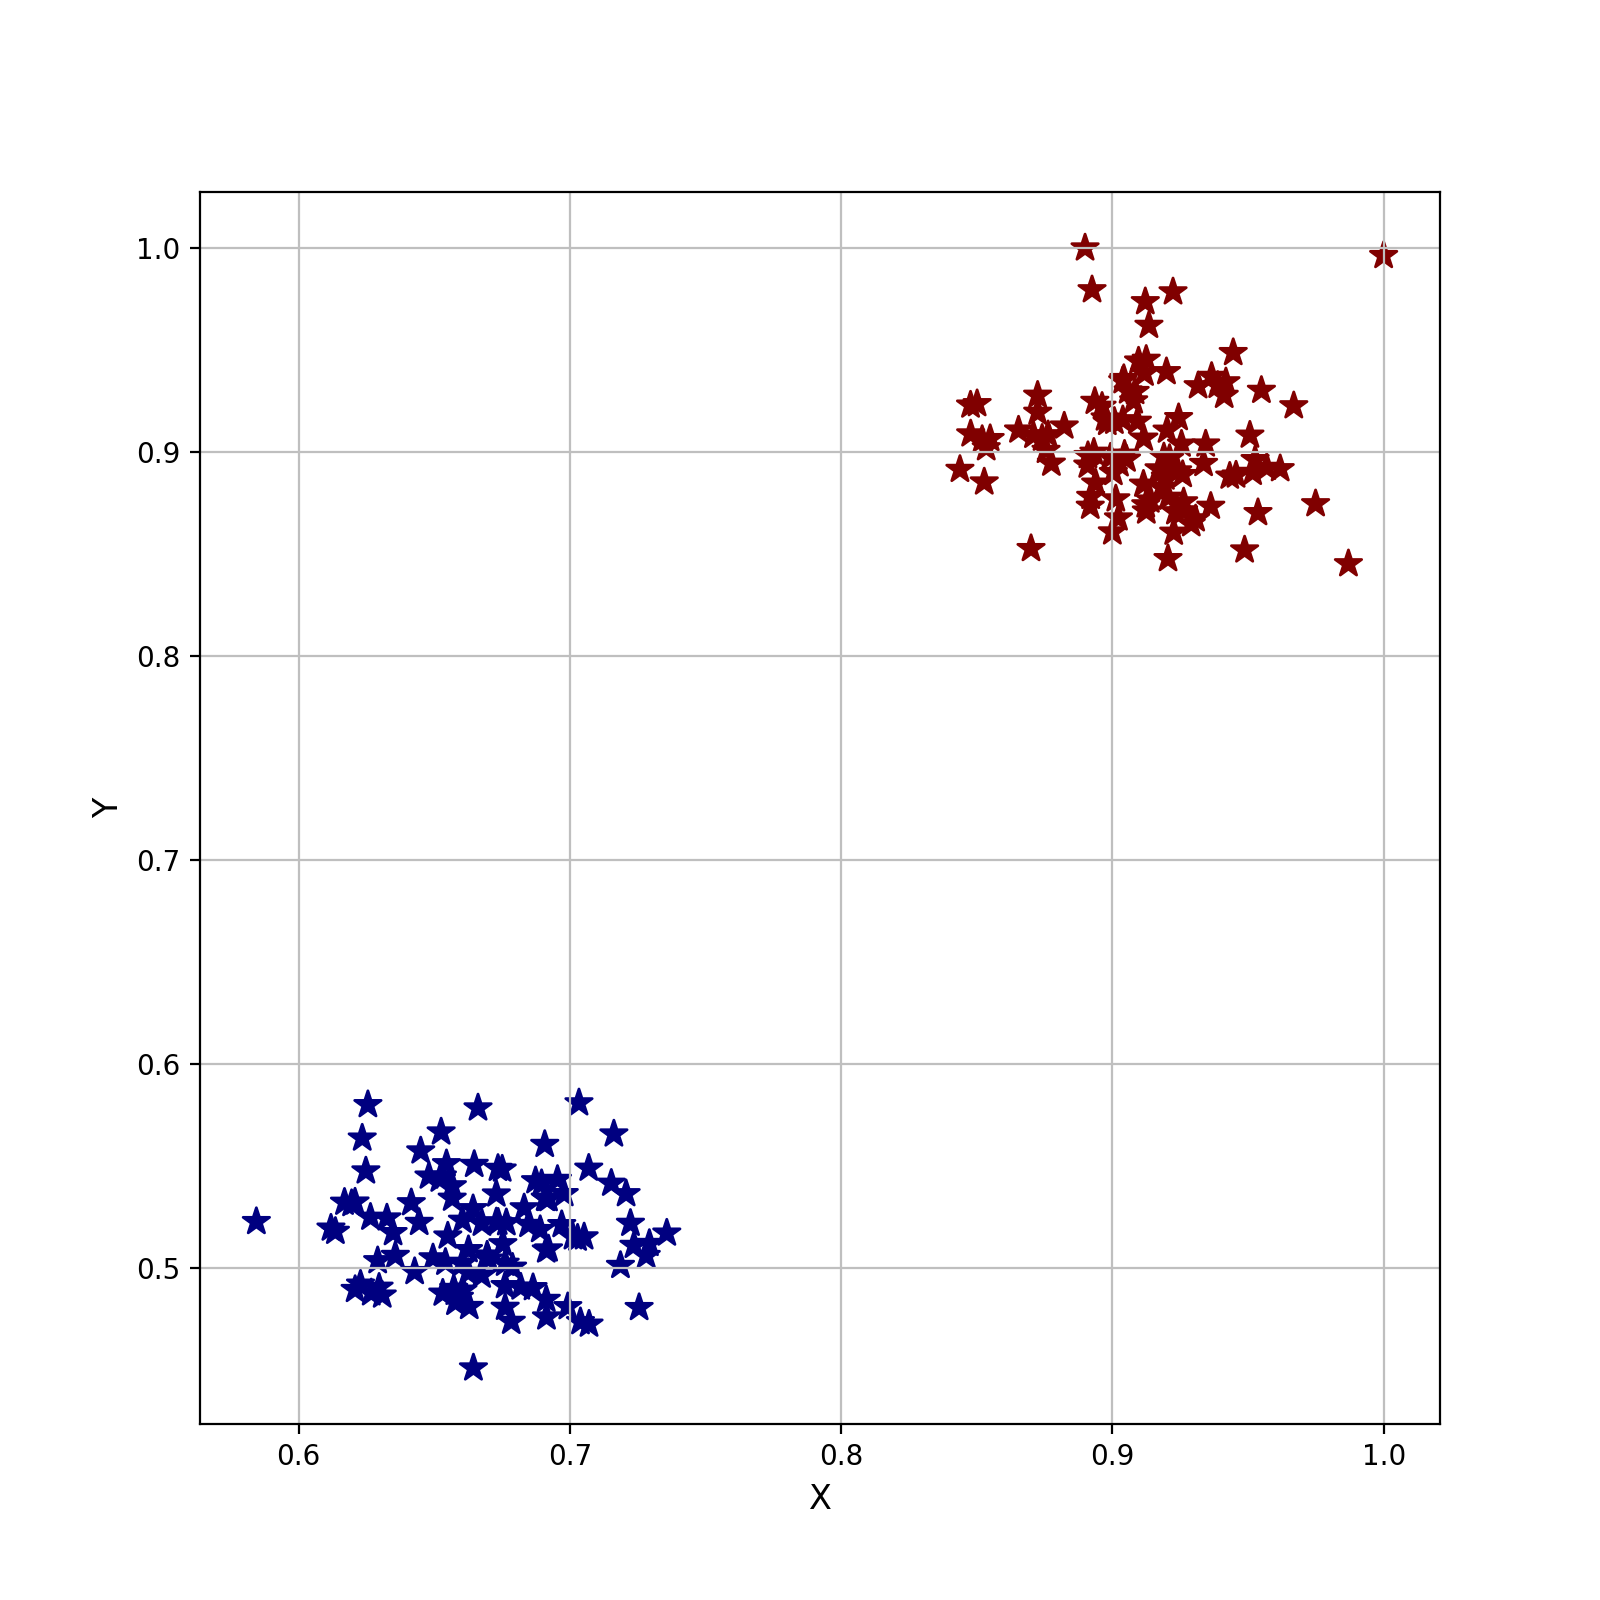

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# ax.set_title("HDBSCAN's Predictions ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
# ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=clusterer.labels_, marker = '*', cmap = cm.jet_r );

plt.show()
# plt.savefig("hdbscan_correct_1.png")

In [9]:
clusterer.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0])

In [10]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1])

In [11]:
mapping = {0:1, 1: 0}
pred_labels = list(map(lambda i: mapping[i], clusterer.labels_))

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score, accuracy_score, normalized_mutual_info_score

def obtain_metrics(x, y_true, y_pred):
    results = dict({})
    results["silhouette_score"] = silhouette_score(x, y_pred)
    results["davies_bouldin_score"] = davies_bouldin_score(x, y_pred)
    results["normalized_mutual_info_score"] = normalized_mutual_info_score(y_true, y_pred)
    results["precision_score"] = precision_score(y_true, y_pred)
    results["recall_score"] = recall_score(y_true, y_pred)
    results["f1_score"] = f1_score(y_true, y_pred)
    results["accuracy_score"] = accuracy_score(y_true, y_pred)
    return results

In [13]:
obtain_metrics(sample_data.data_normalized, y, pred_labels)

{'silhouette_score': 0.8837076,
 'davies_bouldin_score': 0.16482717704930142,
 'normalized_mutual_info_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'accuracy_score': 1.0}